# CH06 ASCII Art

## Step1: main 함수에 대해 생각해 보자. (알고리즘)
1. 이미지 파일을 연다. (.jpg, .png...)
2. ascii art 함수를 실행한다. 
3. 이미지에 대해 ascii art로 실행된 파일이 생성된다. (.txt)

In [19]:
def main():
    #이미지 파일을 연다.
    #ascii art함수를 실행한다.
    #해당 이미지에 대해 ascii art로 변환된 파일이 생성된다.
    pass

main()

In [20]:
def main():
    #이미지 파일을 연다.
    #ascii art함수를 실행한다.
    #해당 이미지에 대해 ascii art로 변환된 파일이 생성된다.
    pass

if __name__ == '__main__':
    main()

## Step1: 이미지 파일 열기

PIL 라이브러리 활용

In [21]:
from PIL import Image

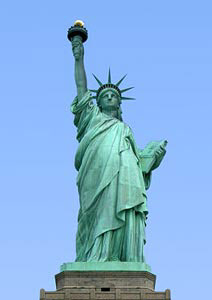

In [22]:
image = Image.open("newyork_free.jpg")
image

PIL에는 흑백모드로 바꾸는 메소드 "convert"도 있넹...

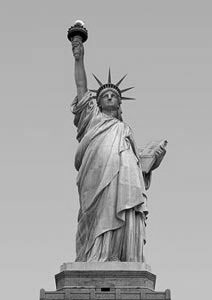

In [23]:
image = Image.open("newyork_free.jpg").convert("L")
image

더 자세한 기능은 tutorial을 보자

https://pillow.readthedocs.io/en/stable/handbook/tutorial.html

## Step2: ascii art함수 


### Step2-1 아스키 아트란? 

이런거에요~
 http://paulbourke.net/dataformats/asciiart/

텍스트 그래픽이다. : 텍스트로 표현하는 그림 (우리 옛날 문자로 많이 했었지..?)

엤날에 문자로 많이 했었는데... 특히 새해인사.. 늘 복붙했다. 이걸 언제 다 타이핑함? 나는 처음 만든 사람은 이걸 일일이 타이핑했다 생각했다...

사실 이건 프로그래밍으로 할 수 있다.!!!

즉, 우리는 사진을 넣으면 자동으로 아스키 아트로 변환하는 프로그래밍을 해볼 것이다.

## Step2-2 전제조건

- 텍스트로 표현해야 하기 때문에 "흑백"사진만 가능. 
- 전문 용어로 그레이 스케일 이라고 한다. 
- 그레이 스케일에도 레벨이 있다. (70레벨, 10레벨)

In [54]:
# 70 레벨의 음영
gscale1 = "$@B%8&WM#*oahkbdpqwmZO0QLCJUYXzcvunxrjft/\|()1{}[]?-_+~<>i!lI;:,\^`'. "
# 10 레벨의 음영
gscale2 = '@%#*+=-:. '

## Step2-3 동작원리 (아스키아트 알고리즘)
- 입력 이미지를 그레이스케일로 변환한다.
- M X N 로 이미지를 분할한다. (분할된 사각형을 타일이라고 함)
- 이미지 행의 개수 M을 이미지와 폰트의 종횡비가 같도록 수정한다. (*폰트의 가로세로 비율)
- 모든 타일의 평균 밝기를 계산하고, 타일별로 적절한 아스키 문자를 검색한다.
- 아스키 문자로 이뤄진 문자열들을 조립하고, 최종 이미지를 생성하기 위해 파일로 출력한다. 

### 입력이미지 그레이스케일로 변환하는건 위에서 했음. 

In [26]:
pass

### M X N 으로 이미지를 분할한다. 

In [32]:
W, H = image.size
W, H

(212, 300)

In [30]:
cols = 80
scale = 0.43

w = W/cols
h = H/scale
w, h

(2.65, 697.6744186046511)

In [31]:
rows = H/h
rows

0

### 평균 밝기 계산

In [37]:
def getAverageL(image):
    im = np.array(image)
    w, h = im.shape
    return np.average(im.reshape(w*h))

이미지는 배열로 나타낼 수 있습니다. 

In [44]:
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)

im = np.array(image)
im

2,
        118, 118, 119, 108, 111, 105, 110, 123, 114, 106, 102,  96, 105,
         85,  85, 100, 101, 106, 104,  89,  82,  89,  95, 109, 108, 100,
         93,  96, 102, 101,  96, 116, 112, 109, 110, 109, 102,  99, 107,
        125, 119, 109,  98,  98, 101, 100,  97, 118, 117, 135, 124, 108,
        117, 119, 123, 129, 123, 128, 123, 120, 116, 112, 131, 123, 113,
        106, 106, 109, 110, 110, 110, 110, 109, 116, 107, 108, 118, 113,
        116, 108, 120, 143, 128, 132, 130, 123, 124, 149, 106,  64, 144,
        206, 196, 194, 195, 194, 194, 194, 194, 194, 194, 194, 194, 194,
        194, 194, 194, 194, 194, 194, 194, 194, 194, 194, 194, 194, 194,
        194, 194, 195, 195, 195, 195, 195, 195, 195, 195, 195, 195, 195,
        195, 195, 195, 195, 195, 194, 194, 194, 194, 194, 194, 194, 194,
        194, 194, 194, 194],
       [194, 194, 194, 194, 194, 194, 194, 194, 194, 194, 194, 194, 194,
        194, 194, 194, 194, 194, 194, 194, 194, 194, 194, 194, 194, 194,
        194, 194, 1

numpy array의 element들은 각 픽셀의 밝기를 나타냄 [0 ~ 255]

In [49]:
im.shape

(300, 212)

In [50]:
w, h = im.shape

In [51]:
np.average(im.reshape(w*h))

168.05595911949686

### 이미지로 부터 아스키 콘텐츠 생성하기

아스키 아트는 문자 리스트다!!

설명 생략! (P143) - for문과 if문의 반복

즉, 반환값은 리스트이고 리스트 안의 원소는 그레이 스케일 의 문자들...

### 파일로 출력하기

In [ ]:
f = open(outFile, 'w')
for row in aimg:
    f.write(row + '\n')
f.close()

## Step2 ascii art 알고리즘은..

흑백 이미지를 그리드로 분할해서 각 타일의 평균 밝기를 계산한 다음 그 밝기와 가장 비슷한 아스키아트용 문자를 찾는 것이다.!

## Step3 Main()함수 구현하기

아까의 알고리즘..

In [53]:
def main():
    #이미지 파일을 연다.
    #ascii art함수를 실행한다.
    #해당 이미지에 대해 ascii art로 변환된 파일이 생성된다.
    pass

In [16]:
import sys, random, argparse
import numpy as np
import math

from PIL import Image

gscale1 = "$@B%8&WM#*oahkbdpqwmZO0QLCJUYXzcvunxrjft/\|()1{}[]?-_+~<>i!lI;:,\"^`'. "
gscale2 = '@%#*+=-:. '

def getAverageL(image):
    """
    Given PIL Image, return average value of grayscale value
    """
    im = np.array(image)
    w,h = im.shape
    return np.average(im.reshape(w*h))

def covertImageToAscii(fileName, cols, scale, moreLevels=None):
    """
    Given Image and dims (rows, cols) returns an m*n list of Images 
    """
    global gscale1, gscale2
    image = Image.open(fileName).convert('L')
    W, H = image.size[0], image.size[1]
    print("input image dims: %d x %d" % (W, H))
    w = W/cols
    h = w/scale
    rows = int(H/h)
    
    print("cols: %d, rows: %d" % (cols, rows))
    print("tile dims: %d x %d" % (w, h))
    if cols > W or rows > H:
        print("Image too small for specified cols!")
        exit(0)
    aimg = []
    for j in range(rows):
        y1 = int(j*h)
        y2 = int((j+1)*h)
        if j == rows-1:
            y2 = H
        aimg.append("")
        for i in range(cols):
            x1 = int(i*w)
            x2 = int((i+1)*w)
            if i == cols-1:
                x2 = W
            img = image.crop((x1, y1, x2, y2))
            avg = int(getAverageL(img))
            if moreLevels:
                gsval = gscale1[int((avg*69)/255)]
            else:
                gsval = gscale2[int((avg*9)/255)]
            aimg[j] += gsval  
    return aimg

def main():
    imgFile = "newyork_free.jpg"
    scale = 0.43
    outFile = 'newyork.txt'
    cols = 80
    aimg = covertImageToAscii(imgFile, cols, scale)

    f = open(outFile, "w")
    for row in aimg:
        f.write(row + '\n')
    f.close()

if __name__ == '__main__':
    main()

input image dims: 212 x 300
cols: 80, rows: 48
tile dims: 2 x 6


## Step4: 명령라인 (Command line)에서 실행해 보자 (즉 터미널!!)


### CLI vs GUI


### Python은 인터프리터 언어다. 

- Python은 Interpreter 언어다..(또 이 이야기)
- 근데 이 말이 진짜 중요함.
- 이말은 즉, 파일을 실행할 때 파이썬 파일을 그냥 샐향할 수 있다는 뜻!!!

### 각자의 CLI에서 실행해 보자 (리눅스-터미널, window-cmd)
리눅스 ```$ python3 hello.py```

윈도우 ```> python3 hello.py```

### "커맨드 라인 인자" 함수의 인자를 command line에서 쳐서 받겠다는뜻!

sub1 ~ 3

## Step5: ascii.py 파일 실행해 보기 